In [1]:
import DSGRN

import numpy as np
import json
import time

# Define a network and parameter graph

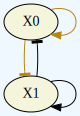

In [2]:
net_spec = 'X0 : ~X1 X0\n X1 : ~X0 X1'

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [3]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 1600


# Select a parameter and sample parameter values

In [4]:
# Get a parameter
par_index = 12

parameter = parameter_graph.parameter(par_index)

In [5]:
# Sample parameter values
sampler = DSGRN.ParameterSampler(network)

par_sample = sampler.sample(parameter)

In [6]:
par_sample

'{"Parameter":{"L[X0->X0]" : 0.51686315682478468, "L[X0->X1]" : 0.097966077502759319, "L[X1->X0]" : 0.97000092728609821, "L[X1->X1]" : 0.042562292659636722, "T[X0->X0]" : 0.85870177048748497, "T[X0->X1]" : 1.7598460955061679, "T[X1->X0]" : 0.45311387604525039, "T[X1->X1]" : 1.0906901137818839, "U[X0->X0]" : 2.5431696079815738, "U[X0->X1]" : 0.72610203974443022, "U[X1->X0]" : 2.0591523631980553, "U[X1->X1]" : 0.47705308993362844}}'

# Get the parameter index from the sampled values

In [7]:
# Define L, U, and T from sample
D = network.size()
L = np.zeros([D, D])
U = np.zeros([D, D])
T = np.zeros([D, D])

# Get a dictionary from sample
sample_dict = json.loads(par_sample)

# Get values of L, U, and T from dictionary
for key, value in sample_dict['Parameter'].items():
    # Get parameter (L, U, or T)
    par_type = key[0]
    # Extract variable names
    node_names = [name.strip() for name in key[2:-1].split('->')]
    node_indices = [network.index(node) for node in node_names]
    if par_type == 'L':
        L[tuple(node_indices)] = value
    elif par_type == 'U':
        U[tuple(node_indices)] = value
    else: # T
        T[tuple(node_indices)] = value

# Get parameter index from sample
sample_par_index = DSGRN.par_index_from_sample(parameter_graph, L, U, T)

if not (sample_par_index == par_index):
    print('Wrong parameter node!', par_index, sample_par_index)
else:
    print('Parameter node found correctly!')

Parameter node found correctly!


# Now let's sample from every node in the parameter graph

In [8]:
# Function to check every parameter of a network
def check_indices_from_sample(network, param_indices=None):
    # Number of samples per node
    num_samples_per_node = 2
    D = network.size()
    all_correct = True
    # Get parameter graph and define parameter sampler
    parameter_graph = DSGRN.ParameterGraph(network)
    sampler = DSGRN.ParameterSampler(network)
    if param_indices == None:
        param_indices = range(parameter_graph.size())
    for par_index in param_indices:
        parameter = parameter_graph.parameter(par_index)
        for n in range(num_samples_per_node):
            # Sample parameter values
            par_sample = sampler.sample(parameter)
            # Get a dictionary from sample
            sample_dict = json.loads(par_sample)
            # Define L, U, and T from sample
            L = np.zeros([D, D])
            U = np.zeros([D, D])
            T = np.zeros([D, D])
            # Get values of L, U, and T from dictionary
            for key, value in sample_dict['Parameter'].items():
                # Get parameter (L, U, or T)
                par_type = key[0]
                # Extract variable names
                node_names = [name.strip() for name in key[2:-1].split('->')]
                node_indices = [network.index(node) for node in node_names]
                if par_type == 'L':
                    L[tuple(node_indices)] = value
                elif par_type == 'U':
                    U[tuple(node_indices)] = value
                else: # T
                    T[tuple(node_indices)] = value
            # Get parameter index from sample
            sample_par_index = DSGRN.par_index_from_sample(parameter_graph, L, U, T)
            if not (sample_par_index == par_index):
                print('Wrong parameter node!', par_index, sample_par_index)
                all_correct = False
    if all_correct:
        print('All parameter nodes found correctly!')

In [9]:
check_indices_from_sample(network)

All parameter nodes found correctly!


# Check for other networks

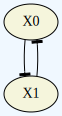

In [10]:
net_spec = 'X0 : ~X1\n X1 : ~X0'

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [11]:
check_indices_from_sample(network)

All parameter nodes found correctly!


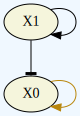

In [12]:
net_spec = 'X0 : ~X1 X0\n X1 : X1'

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [13]:
check_indices_from_sample(network)

All parameter nodes found correctly!


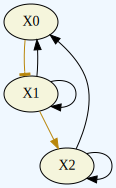

In [14]:
net_spec = 'X0 : X1 + X2 : E\n X1 : ~X0 X1\n X2 : X1 X2'

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [15]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 24000


In [16]:
param_indices = [17998, 17999, 18000, 18001, 18002, 18003, 18004, 18005]

check_indices_from_sample(network, param_indices)

All parameter nodes found correctly!


In [17]:
%%time
check_indices_from_sample(network)

All parameter nodes found correctly!
CPU times: user 47 s, sys: 556 ms, total: 47.5 s
Wall time: 49.6 s
